# Fashion MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Input, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

2025-02-20 13:48:25.842803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740077305.953463  297378 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740077305.989708  297378 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

Here are the names of the 10 classes

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Things to do:
*  Plot a histogram of the class labels to determine balance
*  Plot some random entries from the dataset and their class name
*  Create a DNN based on the MNIST one we made. Use any topology and activation functions you want.
*  When you 'compile' the model, include `metrics=['accuracy']`
*  Train the model
*  Plot the accuracies using the plot code below
*  Evaluate the model on the **test** set and report the result
*  Repeat the last 5 steps -- try to get the best test accuracy
*  Print a confusion matrix (10x10) for the test set
*  Make a grid showing a selection of the misclassified samples, along with their label (probably need to google this)

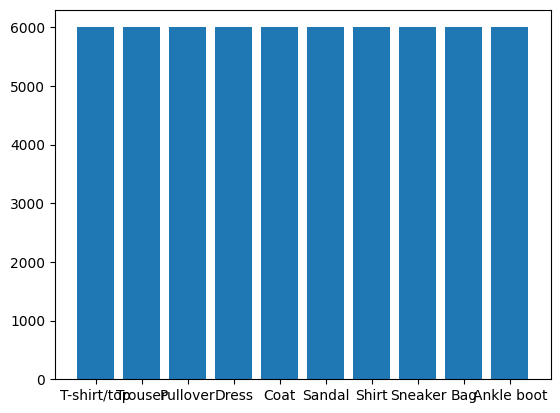

In [4]:
y_train_counts = pd.Series(y_train).value_counts()
plt.bar(class_names, y_train_counts)
plt.show()

The dataset is very balanced.

## Training the model

In [23]:
from keras.layers import *
model = Sequential([
    Input(shape=(28, 28, )),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, validation_split=0.2, batch_size=768)

Epoch 1/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9141 - loss: 0.2342 - val_accuracy: 0.8962 - val_loss: 0.3008
Epoch 2/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9174 - loss: 0.2168 - val_accuracy: 0.8946 - val_loss: 0.3007
Epoch 3/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9237 - loss: 0.2045 - val_accuracy: 0.8963 - val_loss: 0.2941
Epoch 4/4
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9234 - loss: 0.2038 - val_accuracy: 0.8988 - val_loss: 0.2935


In [31]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.8903


## Plotting the Results

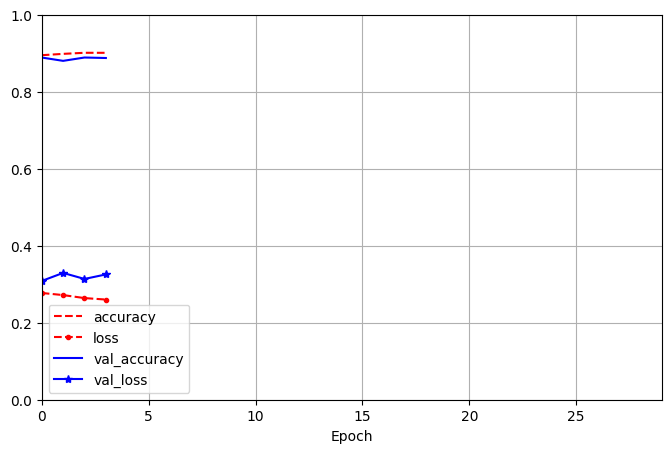

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

## Display your model

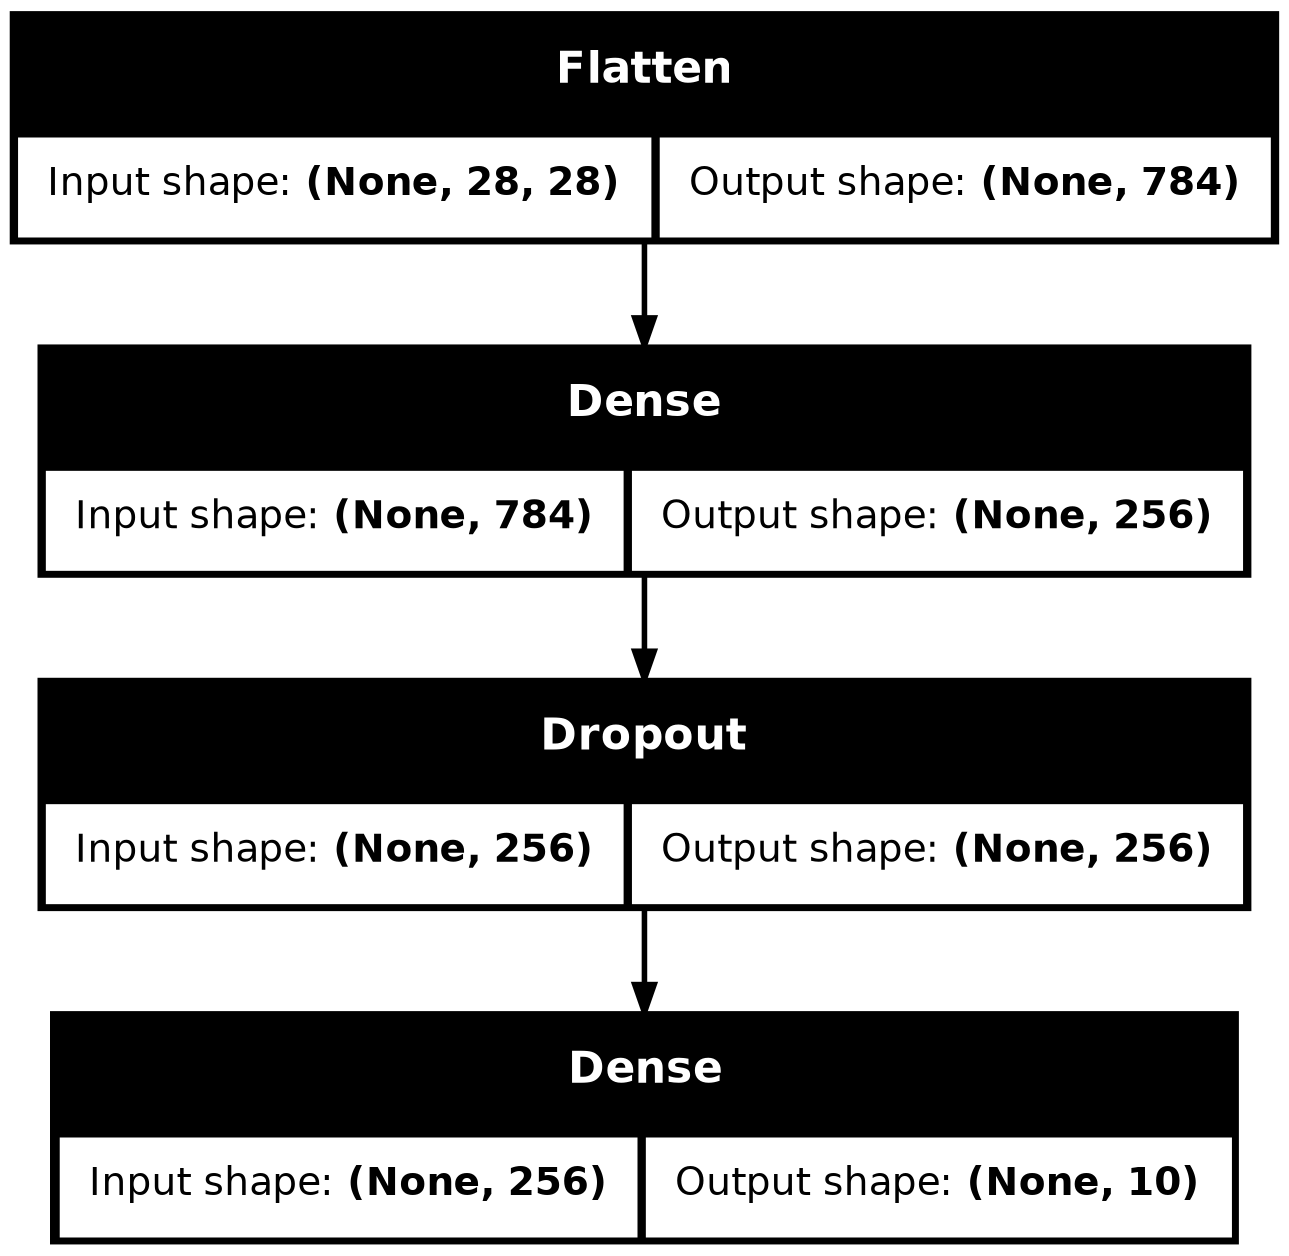

In [8]:
tf.keras.utils.plot_model(model, "Fashion-Mnist.png", show_shapes=True)

## A selection of misclassified samples

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


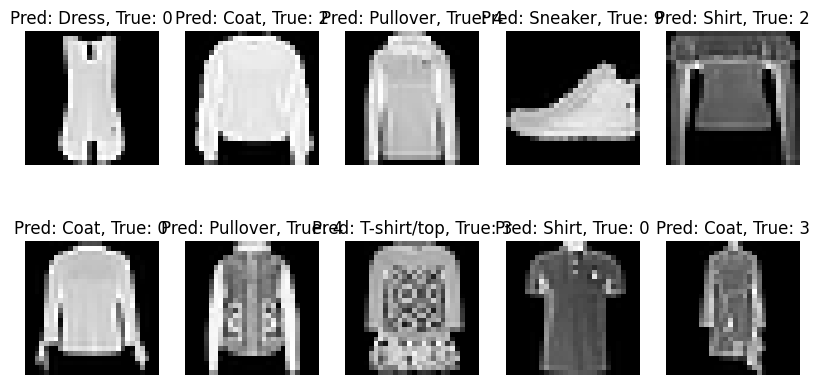

In [33]:
# your code
import numpy as np
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(x_train), axis=1) 

missed = np.where(y_pred != y_train)[0]

num_examples = 10  
plt.figure(figsize=(10, 5))
for i, idx in enumerate(missed[:num_examples]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx].squeeze(), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred[idx]]}, True: {y_train[idx]}")
    plt.axis('off')

plt.show()
